# Star Wars Data Clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json


## Cleaning Raw Data



### Episode 2

In [2]:
filename = './data/02_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines = raw_file.readlines()

print(f'Lines {len(raw_lines)}')

Lines 5493


In [3]:
paragraphs = dict()

paragraph_num = 1
paragraphs[paragraph_num] = dict()
paragraphs[paragraph_num]['lines'] =list()

for line in raw_lines:
    if line == '\n':
        paragraph_num += 1
        paragraphs[paragraph_num] = dict()
        paragraphs[paragraph_num]['lines'] =list()
    else:
        paragraphs[paragraph_num]['lines'].append(line.replace('\n', '').replace('\t', '').replace('�', 'E'))
        
for p_num, content in paragraphs.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break
    

****** 1 (1) *****
['EXT. SPACE', 'A vast sea of stars severas as a backdrop for the Main Title, following by a rollup, whcih crawls into infinity.']
****** 2 (1) *****
['There is unrest in the Galactic Senate', 'Several hundred solar systems under', 'the leadership of the rebel leader, Count', 'Dooku, have decalred their intentions to', 'secede from the Republic.']
****** 3 (1) *****
['This separatist movement has made it', 'difficult for the limited number of', 'Jedi Kights to maintain peace and', 'order in the galaxy.']
****** 4 (1) *****
['Senator Amidala, the former Queen of', 'Naboo, is returning to Coruscant', 'to vote on the critical issue', 'of creating an army to assist the', 'overwhelmed Jedi.']
****** 5 (1) *****
['PAN UP to reveal the amber city planet of Coruscant. A yellow Naboo Fighter flies OVER CAMERA toward the planet, followed by a large Royal Cruiser and two more Fighters.']
****** 6 (1) *****
['EXT. CITYSCAPE, CORUSCANT - DAWN', 'The ships skim across the surface 

In [4]:
save_json = False
if save_json:
    filename = './output/paragraphs.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs, json_file)

In [15]:
actor_regexp = re.compile(r'(([A-Z\-0-9]+)\s?([A-Z0-9\-]+)?)')
actor_lines = dict()
#print(paragraphs[161])
for p_num, content in paragraphs.items():
    #actor_lines[p_num]['actor'] = ''
    if len(content['lines']) >0:
        match = actor_regexp.match(content['lines'][0])
        if match and len(content['lines']) > 1:
            actor_lines[p_num]= dict()
            actor_lines[p_num]['actor'] = match.group(1)
            actor_lines[p_num]['lines'] = content['lines'].copy()
            actor_lines[p_num]['lines'].pop(0)
            #print(f'========= {p_num} {actor_lines[p_num]["actor"]} =====')
            #print(actor_lines[p_num]['lines'])
        else:
            pass
            #print(f'>>> {p_num}')
            #print(content['lines'])
            #print('>>>'*60)
    else:
        pass
        #print(f'>>>> Paragraph {p_num} is empty')
        #print(content['lines'])
        


In [16]:
df_dict = dict()
df_dict['Paragraph'] = list()
df_dict['Character'] = list()
df_dict['Dialogue'] = list()
for p_num, content in actor_lines.items():
    df_dict['Paragraph'].append(p_num)
    df_dict['Character'].append(content['actor'])
    df_dict['Dialogue'].append(' '.join(content['lines']))
    

In [17]:
df = pd.DataFrame.from_dict(df_dict)
df.head()

,Paragraph,Character,Dialogue
0,1,EXT,A vast sea of stars severas as a backdrop for ...
1,2,T,Several hundred solar systems under the leader...
2,3,T,difficult for the limited number of Jedi Kight...
3,4,S,"Naboo, is returning to Coruscant to vote on th..."
4,6,EXT,The ships skim across the surface of the city ...


In [18]:
df['Character'] = df['Character'].str.strip()
df['Character'].unique()

array(['EXT', 'T', 'S', 'CAPTAIN TYPHO', 'PADME', 'CORDE', 'AMIDALA',
       'INT', 'MAS AMEDDA', 'PALPATINE', 'SENATOR ASK', 'A',
       'AMBASSADOR DARSANA', 'ORN FREE', 'MACE WINDU', 'YODA', 'DAR WAC',
       'KI-ADI-MUNDI', 'BAIL ORGANA', 'JAR JAR', 'OBI-WAN', 'ANAKIN',
       'ELAN SLEAZEBAGGANO', 'ELAN', 'ZAM WESSEL', 'ZAM', 'DORME', 'PK-4',
       'SERVER', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA',
       'DEXTER JETTSTER', 'QUEEN JAMILLIA', 'SIO BIBBLE', 'JOCASTA NU',
       'RYOO', 'SOLA', 'JOBAL', 'RUWEE', 'JOVAL', 'CHILDREN',
       'JEDI CHILD', 'MACE', 'MACE-WINDU', 'TAUN WE', 'LAMA SU',
       'OBI-WAM', 'WINDU', 'PAMDE', 'BOBA FETT', 'JANGO FETT', 'JANGO',
       'BOBA', 'WATTO', 'C-3PO', 'OWEN', 'BERU', 'CLIEGG', 'H', 'SHMI',
       'THREEPIO', 'COUNT DOOKU', 'DOOKU', 'SUN RIT', 'POGGLE',
       'NUTE GUNRAY', 'PLO KOON', 'DROID CAPTAIN', 'CLONE CAPTAIN',
       'DARTH SIDIOUS'], dtype=object)

In [19]:
non_characters = ['EXT', 'T', 'S', 'INT', 'A', 'H']

for character in non_characters:
    condition = (df['Character'] == character)
    df.drop(df[condition].index, inplace=True)



In [31]:
replacements = [('BOBA','BOBA FETT'), ('JANGO', 'JANGO FETT',), ( 'MACE', 'MACE WINDU'),
               ('MACE-WINDU', 'MACE WINDU'), ('WINDU', 'MACE WINDU'), ('THREEPIO', 'C-3PO'),
               ('OBI-WAM', 'OBI-WAN'), ('DOOKU', 'COUNT DOOKU')]
for pair in replacements:
    df.loc[df['Character'] == pair[0], 'Character'] = pair[1]

In [32]:
character_list = list(df['Character'].unique())
character_list.sort()
print(character_list)

['AMBASSADOR DARSANA', 'AMIDALA', 'ANAKIN', 'BAIL ORGANA', 'BERU', 'BOBA FETT', 'C-3PO', 'CAPTAIN TYPHO', 'CHILDREN', 'CLIEGG', 'CLONE CAPTAIN', 'CORDE', 'COUNT DOOKU', 'DAR WAC', 'DARTH SIDIOUS', 'DEXTER JETTSTER', 'DORME', 'DROID CAPTAIN', 'ELAN', 'ELAN SLEAZEBAGGANO', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA', 'JANGO FETT', 'JAR JAR', 'JEDI CHILD', 'JOBAL', 'JOCASTA NU', 'JOVAL', 'KI-ADI-MUNDI', 'LAMA SU', 'MACE WINDU', 'MAS AMEDDA', 'NUTE GUNRAY', 'OBI-WAN', 'ORN FREE', 'OWEN', 'PADME', 'PALPATINE', 'PAMDE', 'PK-4', 'PLO KOON', 'POGGLE', 'QUEEN JAMILLIA', 'RUWEE', 'RYOO', 'SENATOR ASK', 'SERVER', 'SHMI', 'SIO BIBBLE', 'SOLA', 'SUN RIT', 'TAUN WE', 'WATTO', 'YODA', 'ZAM', 'ZAM WESSEL']


<AxesSubplot:>

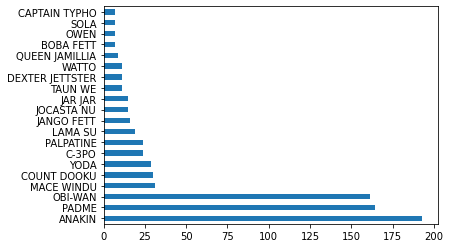

In [33]:
df['Character'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

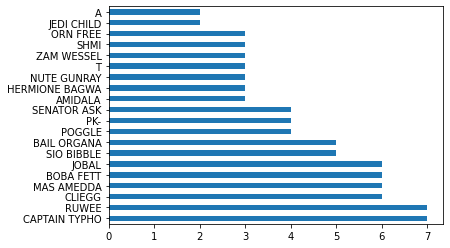

In [11]:
df['Character'].value_counts()[20:40].plot(kind='barh')

<AxesSubplot:>

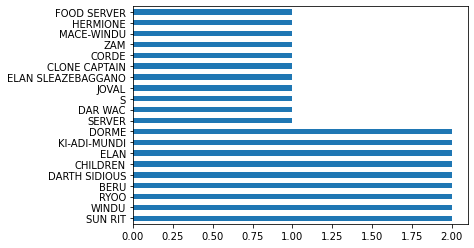

In [12]:
df['Character'].value_counts()[40:60].plot(kind='barh')

In [13]:
df['Character'].unique()

array(['T', 'S', 'CAPTAIN TYPHO', 'PADME', 'CORDE', 'AMIDALA',
       'MAS AMEDDA', 'PALPATINE', 'SENATOR ASK', 'A',
       'AMBASSADOR DARSANA', 'ORN FREE', 'MACE WINDU', 'YODA', 'DAR WAC',
       'KI-ADI-MUNDI', 'BAIL ORGANA', 'JAR JAR', 'OBI-WAN', 'ANAKIN',
       'ELAN SLEAZEBAGGANO', 'ELAN', 'ZAM WESSEL', 'ZAM', 'DORME', 'PK-',
       'SERVER', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA',
       'DEXTER JETTSTER', 'QUEEN JAMILLIA', 'SIO BIBBLE', 'JOCASTA NU',
       'RYOO', 'SOLA', 'JOBAL', 'RUWEE', 'JOVAL', 'CHILDREN',
       'JEDI CHILD', 'MACE', 'MACE-WINDU', 'TAUN WE', 'LAMA SU',
       'OBI-WAM', 'WINDU', 'PAMDE', 'BOBA FETT', 'JANGO FETT', 'JANGO',
       'BOBA', 'WATTO', 'C-', 'OWEN', 'BERU', 'CLIEGG', 'SHMI',
       'THREEPIO', 'COUNT DOOKU', 'DOOKU', 'SUN RIT', 'POGGLE',
       'NUTE GUNRAY', 'PLO KOON', 'DROID CAPTAIN', 'CLONE CAPTAIN',
       'DARTH SIDIOUS'], dtype=object)